In [39]:
import pandas as pd
from rich import print
from SyntheticControlMethods import Synth

from covid19_drdfm.covid19 import get_df


## Demo Example

In [40]:
# Import data
data_dir = "https://raw.githubusercontent.com/OscarEngelbrektson/SyntheticControlMethods/master/examples/datasets/"
df = pd.read_csv(data_dir + "smoking_data" + ".csv")
df.head()

,state,year,cigsale,lnincome,beer,age15to24,retprice
0,Alabama,1970.0,89.8,NaN,NaN,0.178862,39.6
1,Alabama,1971.0,95.4,NaN,NaN,0.179928,42.7
2,Alabama,1972.0,101.1,9.498476,NaN,0.180994,42.3
3,Alabama,1973.0,102.9,9.550107,NaN,0.182060,42.1
4,Alabama,1974.0,108.2,9.537163,NaN,0.183126,43.1


In [41]:
df.dtypes

state         object
year         float64
cigsale      float64
lnincome     float64
beer         float64
age15to24    float64
retprice     float64
dtype: object

Running model

In [42]:
df = df.rename(columns={"cigsale": "Pandemic"})
sc = Synth(df, "Pandemic", "state", "year", 1989, "California", n_optim=10, pen="auto")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.20995D+04    |proj g|=  2.00000D+01

At iterate    3    f=  1.36783D+02    |proj g|=  1.81324D+01

At iterate    6    f=  1.35389D+02    |proj g|=  1.94035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6      9     11     0     0   1.940D-02   1.354D+02
  F =   135.38891275424271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7    116     18     0     6   6.490D+00   2.197D+03
  F =   2197.1176416593821     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44723D+03    |proj g|=  1.53292D+01

At iterate    3    f=  5.05580D+02    |proj g|=  6.73321D+00

At iterate    6    f=  3.29502D+02    |proj g|=  1.32355D+01

At iterate    9    f=  3.25170D+02    |proj g|=  5.47402D-03

       

In [43]:
sc.original_data.weight_df

,Weight
New Hampshire,0.253153
Utah,0.746847


In [44]:
sc.original_data.comparison_df

,California,Synthetic California,WMAPE,Importance
Pandemic,116.21,116.07,66.67,0.22
lnincome,10.03,9.72,0.31,0.22
beer,24.28,18.81,10.87,0.22
age15to24,0.18,0.19,0.01,0.22
retprice,66.64,63.38,3.25,0.14


In [45]:
print(f'PEN: {sc.original_data.pen}')

PEN: 1.8763149147474656

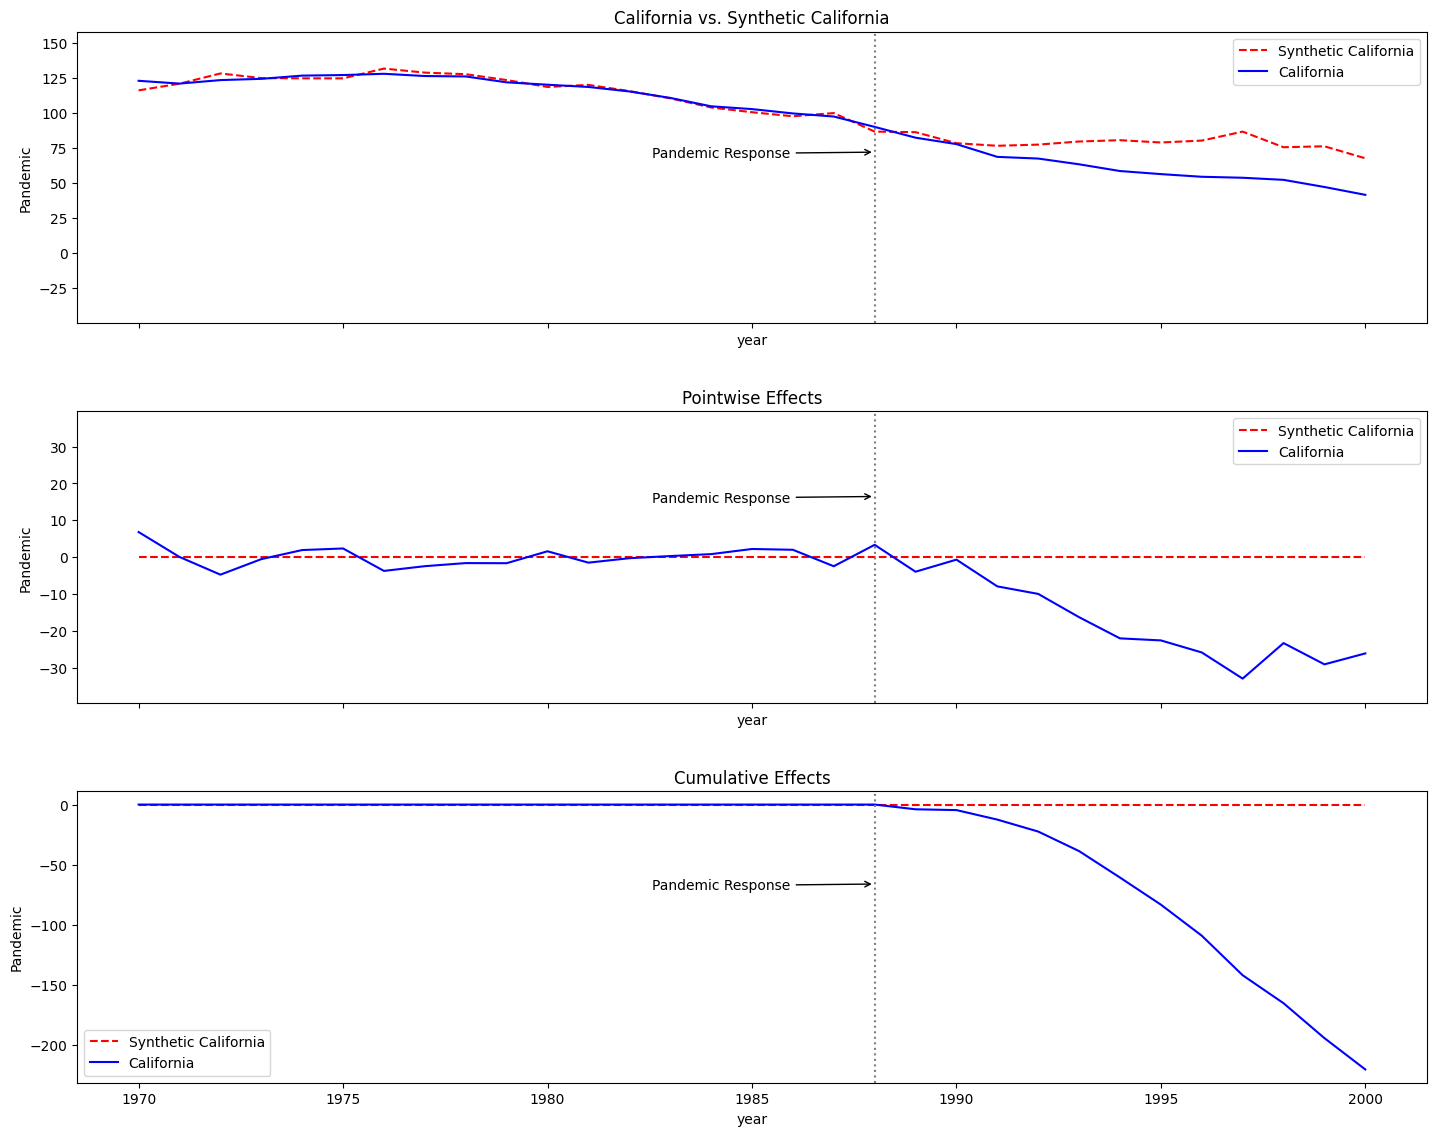

In [46]:
sc.plot(
    ["original", "pointwise", "cumulative"],
    treated_label="California",
    synth_label="Synthetic California",
    treatment_label="Pandemic Response",
)

## Test Example Covid-19 Data

> Run a small subset of the data to test SCM

"Minimal test set"

> Aaron — Yesterday at 8:54 PM
> Simple example: Use a single state as the treated unit, the other 49 as the pool of potential comparisons. Use the entire time frame. Choose Feb 2020 as the treatment time. Outcome variable will be the factor Pandemic (dont care what run). Predictor variables will be Consumption 1-4.

1. Single State as **Treated Unit**
2. Use entire timeframe
3. Feb 2020 as **Treatment Time**
4. **Outcome variable** will be `Pandemic`
5. **Predictor variables** will be `Consumption {1..4}`

I created a run with the following Factor/Variable parameters:

1. **Pandemic** - Cases1/4, Deaths2/4
2. **Consumption** - Cons1/2/3/4
3. **Inflation** - CPIU, PCE
4. **Employment** - Employment1/2
5. **Uncat** - Tbill1yr/10yr

- **Global multiplier**:  1
- All 50 states
- State Date: `2012/01/01`


Read in Raw Data

In [47]:
# | label: tbl-raw
# | tbl-cap: Preprocessed Covid-19 data. Used as input to Dynamic Factor Model
variables = [
    "Cases1",
    "Cases4",
    "Deaths2",
    "Deaths4",
    "CPIU",
    "PCE",
    "Employment1",
    "Employment2",
    "TBill1yr",
    "TBill10yr",
]
factors = ["Pandemic", "Consumption", "Inflation", "Employment", "Uncat"]
fac_labels = [f'Factor_{x}' for x in factors]
df = get_df().set_index(["Time", "State"])
df

,,GDP,UI,Cons1,Cons3,Cons4,Cons5,Cons2,Employment1,Employment2,CPIU,...,School,Mask2,CPI,FFR,Cases4,Cases1,Hosp2,Hosp1,Deaths4,Deaths1
Time,State,,,,,,,,,,,,,,,,,,,,,
2012-01-01,AK,59188.506187,16588.0,30243.305512,3050.166292,6277.104330,20916.034890,9327.270622,141584,133246,100.000000,...,NaN,0,100.000000,0.08,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,AK,58911.647998,16498.0,30267.232575,3054.732366,6271.150401,20941.349808,9325.882767,141858,133518,100.213745,...,NaN,0,100.219491,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,AK,58654.835314,15407.0,30300.772046,3060.259688,6267.233168,20973.279190,9327.492856,142036,133744,100.423539,...,NaN,0,100.438982,0.13,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,AK,58629.129700,14251.0,30352.105154,3067.577220,6267.031155,21017.496779,9334.608375,141899,133827,100.590321,...,NaN,0,100.614574,0.14,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,AK,58746.249106,11884.0,30477.365987,3082.365954,6282.095622,21112.904412,9364.461575,142206,133935,100.382283,...,NaN,0,100.395083,0.16,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,WY,40135.323721,988.0,24043.089142,2747.262813,5529.117634,15766.681754,8276.434329,158694,153332,129.747808,...,NaN,0,129.762950,2.33,6996.0,4950.0,48.0,42.0,0.0,0.0
2022-09-01,WY,40067.899544,934.0,24105.123476,2750.012082,5559.587287,15795.503971,8309.659777,158850,153682,130.248593,...,NaN,0,130.289728,2.56,2033.0,1452.0,48.0,46.0,0.0,0.0
2022-10-01,WY,39857.704169,1326.0,24158.395053,2751.792740,5587.919833,15818.669106,8339.779441,158593,154006,130.819603,...,NaN,0,130.860404,3.08,1839.0,1225.0,63.0,58.0,0.0,0.0


Load in results

In [48]:
factor_path = './factors.csv'
factors = pd.read_csv(factor_path).sort_values(['State', 'Time']).set_index(['Time', 'State'])
factors

,,Factor_Global,Factor_Consumption,Factor_Pandemic,Factor_Employment,Factor_Inflation,Factor_Uncat,Factor_Cases1,Factor_Cases4,Factor_Deaths2,Factor_Deaths4,...,Factor_Cons2,Factor_Cons3,Factor_Cons4,Factor_Employment1,Factor_Employment2,Factor_CPIU,Factor_PCE,Factor_TBill1yr,Factor_TBill10yr,Time.1
Time,State,,,,,,,,,,,,,,,,,,,,,
2012-03-01,AK,-0.015681,0.051635,-0.449249,-0.039851,0.003441,-0.556079,58654.835314,3060.259688,133744.0,99.595,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2012-03-01
2012-04-01,AK,0.002285,-0.008629,-0.290451,0.004200,-0.001036,-0.531595,58629.129700,3067.577220,133827.0,99.746,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2012-04-01
2012-05-01,AK,-0.094434,0.107928,-0.219792,-0.074170,-0.003160,-0.542247,58746.249106,3082.365954,133935.0,99.847,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2012-05-01
2012-06-01,AK,0.016303,-0.018640,-0.232055,0.016557,-0.000293,-0.505548,58827.028003,3095.261975,134007.0,99.950,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2012-06-01
2012-07-01,AK,0.037237,-0.042083,-0.345527,0.028539,0.001618,-0.494102,58688.490074,3105.490943,134153.0,100.053,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2012-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,WY,-0.205975,-0.362219,1.853429,0.167413,-0.002689,0.354455,40135.323721,2747.262813,153332.0,124.031,...,4796.0,3361.0,24.0,4797.0,25.0,NaN,NaN,4950.0,42.0,2022-08-01
2022-09-01,WY,-2.324012,-0.605329,1.689463,-0.330185,-0.023234,0.721036,40067.899544,2750.012082,153682.0,124.607,...,1900.0,1363.0,13.0,1900.0,13.0,NaN,NaN,1452.0,46.0,2022-09-01
2022-10-01,WY,-5.783781,0.510601,0.909678,-3.590269,-0.057579,1.587209,39857.704169,2751.792740,154006.0,124.987,...,437.0,282.0,5.0,0.0,0.0,NaN,NaN,1225.0,58.0,2022-10-01


::: {.callout-warning}
## Bug

Output should be missing 1 month not two >=(
:::

Merge data

In [49]:
merge = factors.join(df).reset_index()
merge = merge[ ['Time', 'State', 'Cons1', 'Cons2', 'Cons3', 'Cons4', 'Factor_Pandemic']]
merge

,Time,State,Cons1,Cons2,Cons3,Cons4,Factor_Pandemic
0,2012-03-01,AK,30300.772046,9327.492856,3060.259688,6267.233168,-0.449249
1,2012-04-01,AK,30352.105154,9334.608375,3067.577220,6267.031155,-0.290451
2,2012-05-01,AK,30477.365987,9364.461575,3082.365954,6282.095622,-0.219792
3,2012-06-01,AK,30583.878280,9388.540079,3095.261975,6293.278103,-0.232055
4,2012-07-01,AK,30664.034824,9404.526770,3105.490943,6299.035826,-0.345527
...,...,...,...,...,...,...,...
6495,2022-08-01,WY,24043.089142,8276.434329,2747.262813,5529.117634,1.853429
6496,2022-09-01,WY,24105.123476,8309.659777,2750.012082,5559.587287,1.689463
6497,2022-10-01,WY,24158.395053,8339.779441,2751.792740,5587.919833,0.909678
6498,2022-11-01,WY,24278.809669,8393.022243,2761.241690,5631.707069,0.115532


Map parameters from DataFrame to example

In [55]:
sc = Synth(merge, "Factor_Pandemic", "State", "Time", "2020-03-01", "CA", n_optim=10, pen="auto")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.22902D+00    |proj g|=  8.00000D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      5     0     5   8.000D-01   3.229D+00
  F =   3.2290155612753972     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58127D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1      2      1     0     0   4.441D-08   1.581D+00
  F =   1.5812744057844204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.4

In [56]:
sc.original_data.weight_df

,Weight
NY,1.0


In [57]:
sc.original_data.comparison_df

,CA,Synthetic CA,WMAPE,Importance
Cons1,1550687.80,829826.45,720861.35,0.31
Cons2,446281.76,238094.07,208187.68,0.01
Cons3,148252.70,70216.28,78036.42,0.14
Cons4,298029.09,167877.82,130151.26,0.11
Factor_Pandemic,0.11,0.04,0.07,0.43


In [58]:
print(f'PEN: {sc.original_data.pen}')

PEN: 3.2664371803611227

TypeError: unsupported operand type(s) for -: 'str' and 'int'

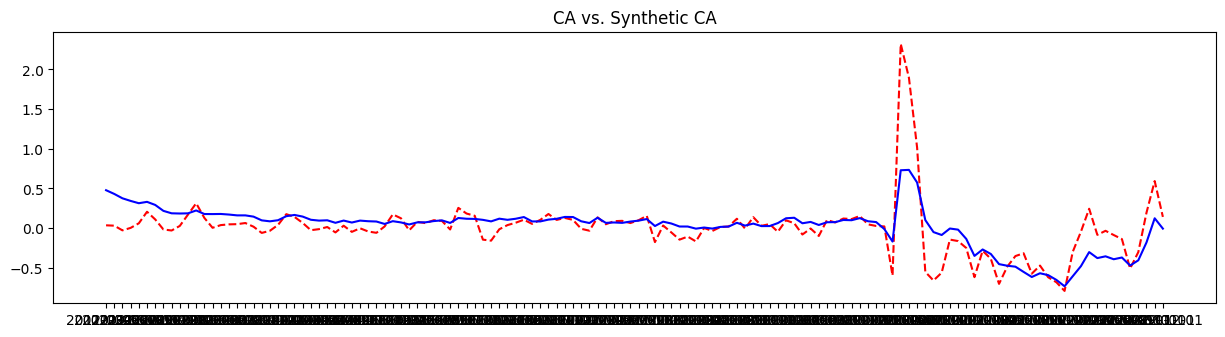

In [59]:
sc.plot(
    ["original", "pointwise", "cumulative"],
    treated_label="CA",
    synth_label="Synthetic CA",
    treatment_label="Pandemic Response",
)

## Full SCM Example